# Consumer Complaints Analysis

Customer service is an essential part of any organization since it help develop a customer base. Our main aim is to implement a sentiment analysis with the main customer service issues with some of the organizations. We want to determine what is the opinion "out there" of the main issues and "recommend" several solutions to improve this sentiment some customers have towards a specific final institution.

1) Determine the top companies that received more disputes.

2) Is the trend of disputes increasing or decreasing?

3) What is the overall sentiment of the issues?

4) What is the sentiment for the top organizations that have disputes with regards to the issues declared by the customer

# Main objective

Main objective is to classify products on the basis on customer review

In [1]:
# Importing Necessary libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
bank_data = pd.read_csv(r'D:\Rohit\Data Science Class\Thane Dec BAtch\consumer_complaints.csv')
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

Rows and Columns in our Dataset

In [3]:
bank_data.shape

(555957, 18)

First 5 Rows in Dataset

In [4]:
bank_data.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


Datatypes in Dataset

In [5]:
bank_data.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

Checking missing values or nan values in our dataset in persentatge

In [6]:
bank_data.isnull().sum()/bank_data.shape[0]*100

date_received                    0.000000
product                          0.000000
sub_product                     28.477382
issue                            0.000000
sub_issue                       61.755675
consumer_complaint_narrative    87.983603
company_public_response         84.688744
company                          0.000000
state                            0.879025
zipcode                          0.810314
tags                            85.977513
consumer_consent_provided       77.793606
submitted_via                    0.000000
date_sent_to_company             0.000000
company_response_to_consumer     0.000000
timely_response                  0.000000
consumer_disputed?               0.000000
complaint_id                     0.000000
dtype: float64

Replaceing Nan Values

In [7]:
bank_data['sub_product'].mode()

0    Other mortgage
Name: sub_product, dtype: object

In [8]:
bank_data['sub_product'].fillna('Other mortgage', inplace = True)

In [9]:
bank_data['sub_issue'].mode()

0    Account status
Name: sub_issue, dtype: object

In [10]:
bank_data['sub_issue'].fillna('Account status', inplace = True)

In [11]:
bank_data['tags'].mode()

0    Older American
Name: tags, dtype: object

In [12]:
bank_data['tags'].fillna('Older American', inplace = True)

In [13]:
bank_data['consumer_consent_provided'].mode()

0    Consent provided
Name: consumer_consent_provided, dtype: object

In [14]:
bank_data['consumer_consent_provided'].fillna('Consent provided', inplace = True)

# Exploratory Data Analysis

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:xlabel='product', ylabel='count'>

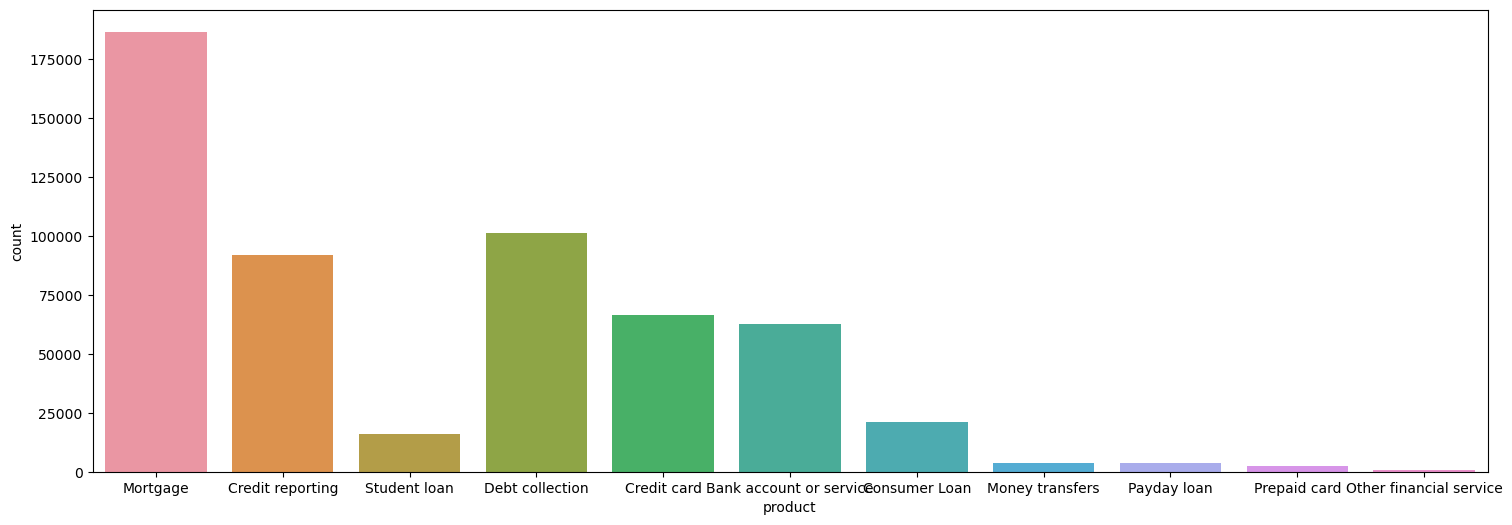

In [16]:
fig,ax = plt.subplots(figsize=(18,6))
sns.countplot(x='product',data=bank_data)

<AxesSubplot:xlabel='product'>

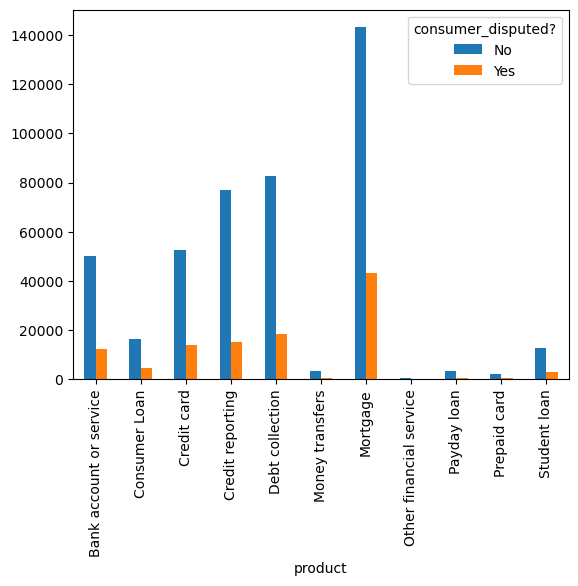

In [17]:
pd.crosstab(bank_data['product'],bank_data['consumer_disputed?']).plot(kind='bar')

2011-12-01 00:00:00 2016-04-25 00:00:00


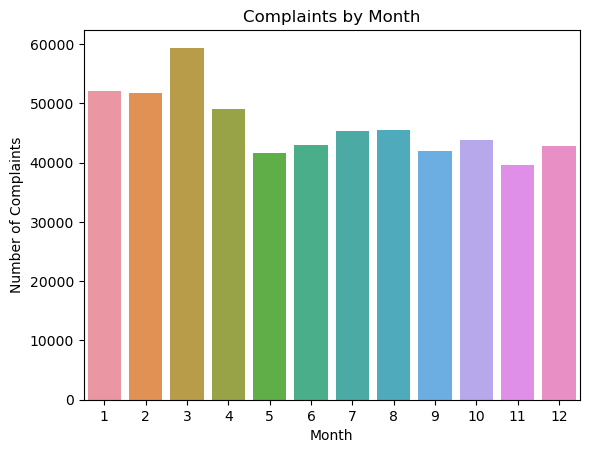

In [18]:
import datetime
bank_data['date_received'] = pd.to_datetime(bank_data['date_received'])
print(bank_data['date_received'].min(), bank_data['date_received'].max())
bank_data['month'] = bank_data['date_received'].dt.month
sns.countplot(x='month', data=bank_data)
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.title('Complaints by Month')
plt.show()

<AxesSubplot:xlabel='timely_response', ylabel='count'>

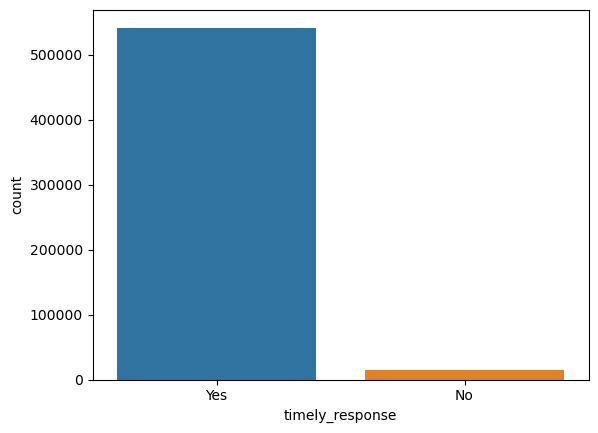

In [19]:
sns.countplot(x='timely_response',data=bank_data)

# Determine the top companies that received more disputes.

In [20]:
disputes_by_company = bank_data[bank_data['consumer_disputed?'] == 'Yes'].groupby('company').size()
top_companies = disputes_by_company.sort_values(ascending=False).head(10)

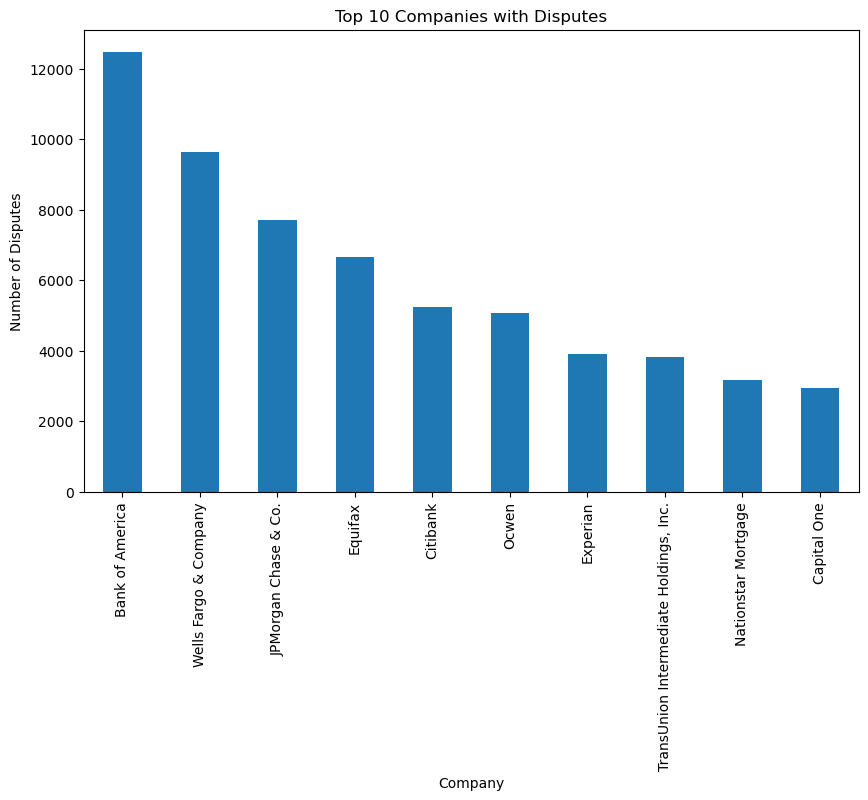

In [21]:
plt.figure(figsize=(10, 6))
top_companies.plot(kind='bar')
plt.title('Top 10 Companies with Disputes')
plt.xlabel('Company')
plt.ylabel('Number of Disputes')
plt.show()

# Is the trend of disputes increasing or decreasing?

In [22]:
bank_data['date_received'] = pd.to_datetime(bank_data['date_received'])
disputes_by_year = bank_data.groupby(bank_data['date_received'].dt.year).size()

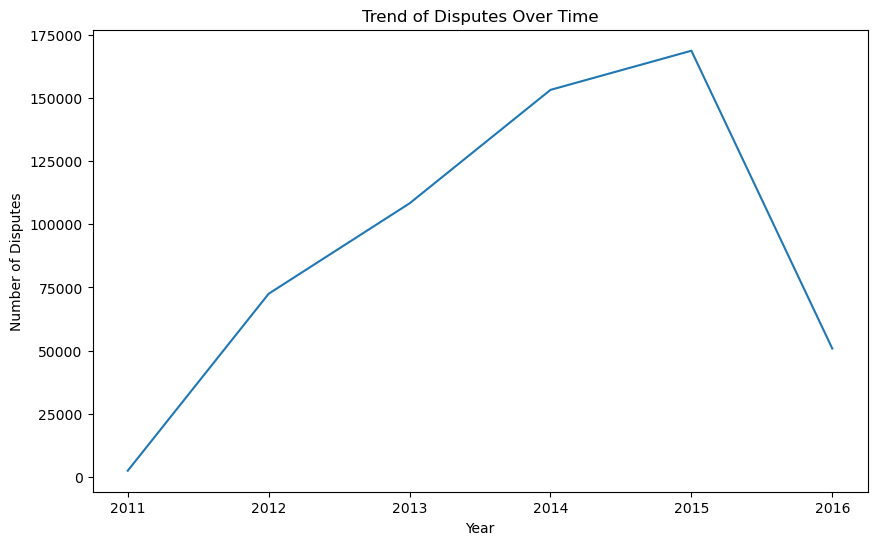

In [23]:
plt.figure(figsize=(10, 6))
disputes_by_year.plot(kind='line')
plt.title('Trend of Disputes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disputes')
plt.show()

# What is the overall sentiment of the issues?

In [24]:
bank_data1 = bank_data[["company","issue","consumer_disputed?"]]

In [25]:
bank_data1[bank_data1['consumer_disputed?'] == 'Yes'].value_counts()

company                                   issue                                     consumer_disputed?
Bank of America                           Loan modification,collection,foreclosure  Yes                   5432
Equifax                                   Incorrect information on credit report    Yes                   4257
Wells Fargo & Company                     Loan modification,collection,foreclosure  Yes                   3437
TransUnion Intermediate Holdings, Inc.    Incorrect information on credit report    Yes                   2536
Experian                                  Incorrect information on credit report    Yes                   2472
                                                                                                          ... 
Orions Management Group, LLC              Improper contact or sharing of info       Yes                      1
Out Tech, Inc.                            Cont'd attempts collect debt not owed     Yes                      1
Overton, 

In [26]:
bank_data1.sort_values(["issue"]).value_counts()

company                                 issue                                     consumer_disputed?
Experian                                Incorrect information on credit report    No                    19461
Equifax                                 Incorrect information on credit report    No                    18281
Bank of America                         Loan modification,collection,foreclosure  No                    17989
TransUnion Intermediate Holdings, Inc.  Incorrect information on credit report    No                    16760
Wells Fargo & Company                   Loan modification,collection,foreclosure  No                    11392
                                                                                                        ...  
PNC Bank N.A.                           Privacy                                   No                        1
Eisenburg,Whitman and Associates        Charged bank acct wrong day or amt        No                        1
Edward F Bukaty III

# Insights

# Top issues frequently complained between top 10 companies:

1.Loan modification, collection, closure

2.Loan servicing, payments, escrow account

3.Inability to obtain credit report/score

4.Account opening, closing, or management

# Trend of disputes increasing or decreasing?

Trend for disputes in increasing from year 2011 to 2015 and from year 2015 to 2016 it's decreasing

# Data Preprocessing

REMOVING STOP WORDS,SPECIAL CHARACTERS,DUPLICATE WORDS, STEMMING, CONVERTING TO LOWER , etc

In [27]:
bank_data2 = bank_data[["product","issue","sub_issue"]]

In [28]:
bank_data2["Detail_issues"]=bank_data2["issue"].str.cat(bank_data2["sub_issue"], sep=' ', na_rep='')

In [29]:
bank_data2.drop(["issue","sub_issue"],inplace=True,axis=1)

In [30]:
bank_data2.isnull().sum()

product          0
Detail_issues    0
dtype: int64

In [31]:
bank_data2.head()

,product,Detail_issues
0,Mortgage,"Loan modification,collection,foreclosure Accou..."
1,Mortgage,"Loan servicing, payments, escrow account Accou..."
2,Credit reporting,Incorrect information on credit report Account...
3,Student loan,Repaying your loan Repaying your loan
4,Debt collection,False statements or representation Attempted t...


In [32]:
# Converting Text data to Lowercase

In [33]:
bank_data2['processed_text'] =bank_data2['Detail_issues'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))

In [34]:
bank_data2['processed_text'].head(2)

0    loan modification,collection,foreclosure accou...
1    loan servicing, payments, escrow account accou...
Name: processed_text, dtype: object

In [35]:
# Removing Punctuations

In [36]:
bank_data2['processed_text'] =bank_data2['Detail_issues'].str.replace(r'[^\w\s]',"")

In [37]:
bank_data2['processed_text'] =bank_data2['Detail_issues'].str.replace(r"xx+\s","")

In [38]:
bank_data2['processed_text']

0         Loan modification,collection,foreclosure Accou...
1         Loan servicing, payments, escrow account Accou...
2         Incorrect information on credit report Account...
3                     Repaying your loan Repaying your loan
4         False statements or representation Attempted t...
                                ...                        
555952    Loan modification,collection,foreclosure Accou...
555953    Loan servicing, payments, escrow account Accou...
555954    Loan modification,collection,foreclosure Accou...
555955     Communication tactics Frequent or repeated calls
555956    Cont'd attempts collect debt not owed Debt is ...
Name: processed_text, Length: 555957, dtype: object

In [39]:
# Removing Stopwords

In [40]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
stop_words = set(stopwords.words('english'))

stemmer = SnowballStemmer('english')

def preprocess_text(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

bank_data2['processed_text'] = bank_data2['Detail_issues'].apply(preprocess_text)

In [42]:
print(bank_data2.processed_text)

0         loan modification,collection,foreclosur accoun...
1         loan servicing, payments, escrow account accou...
2             incorrect inform credit report account status
3                                     repay loan repay loan
4         fals statement represent attempt collect wrong...
                                ...                        
555952    loan modification,collection,foreclosur accoun...
555953    loan servicing, payments, escrow account accou...
555954    loan modification,collection,foreclosur accoun...
555955                 communic tactic frequent repeat call
555956            cont'd attempt collect debt owe debt mine
Name: processed_text, Length: 555957, dtype: object


In [43]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [44]:
bank_data2['processed_text'] = bank_data2['Detail_issues'].apply(lambda x: ' '.join([lemmatizer.lemmatize(i) for i in x.split()]))

In [45]:
bank_data2['processed_text'].head(2)

0    Loan modification,collection,foreclosure Accou...
1    Loan servicing, payments, escrow account Accou...
Name: processed_text, dtype: object

In [46]:
# Word Cloud for all Product categories

Mortgage


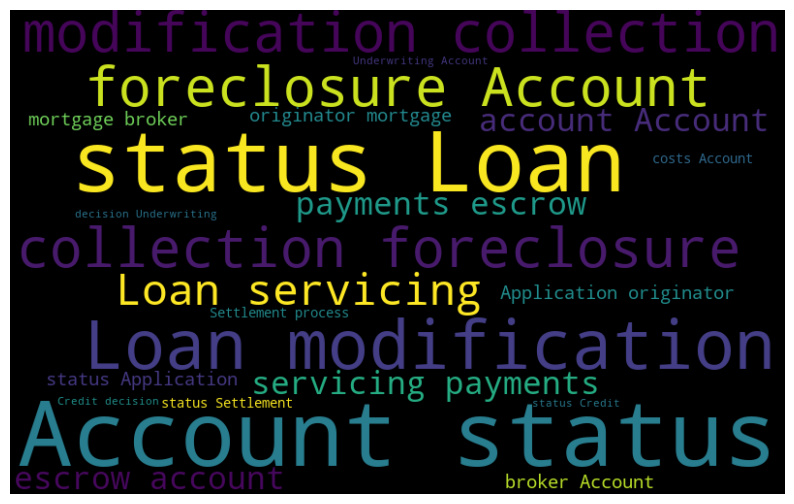

Credit reporting


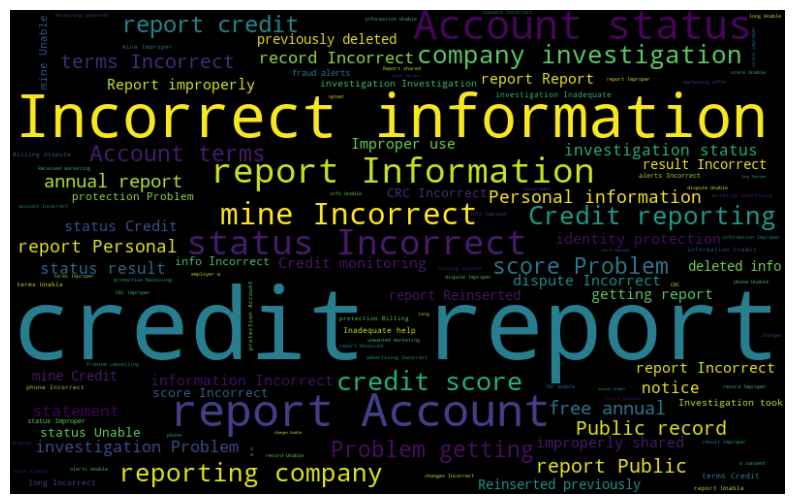

Student loan


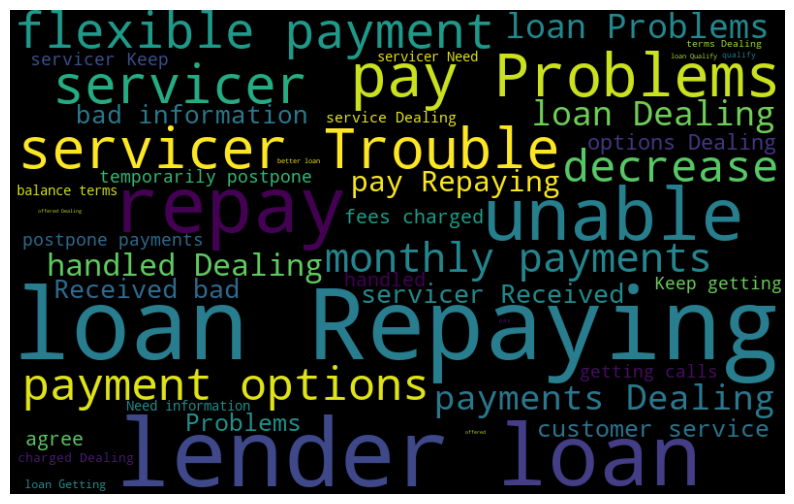

Debt collection


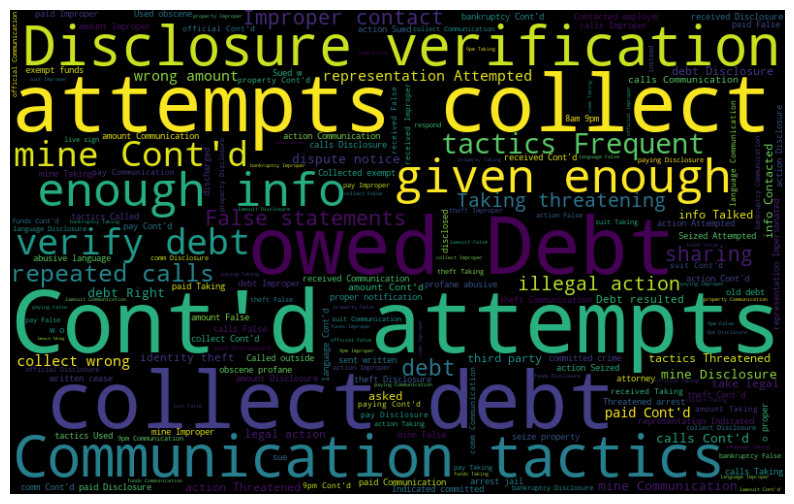

Credit card


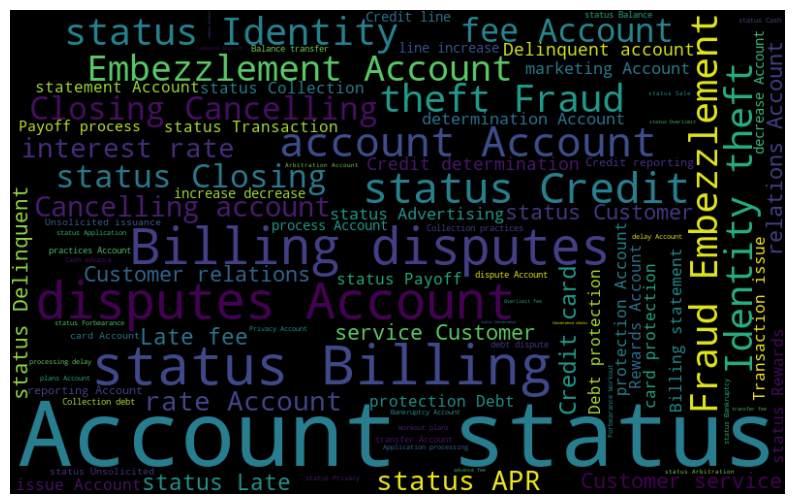

Bank account or service


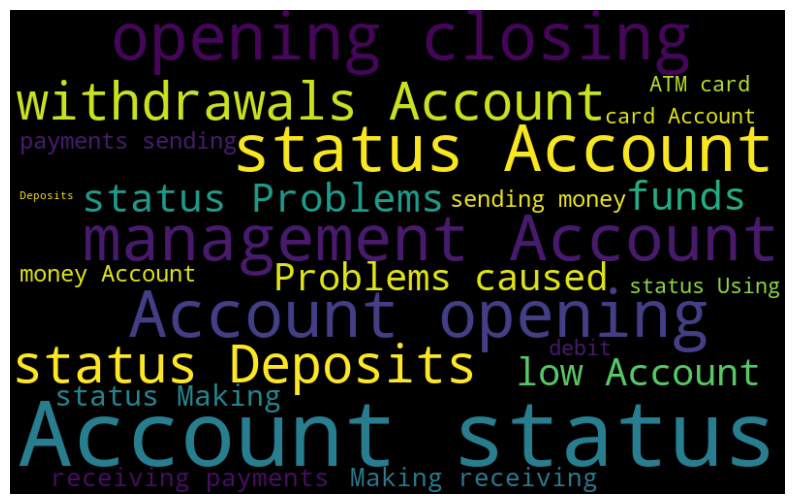

Consumer Loan


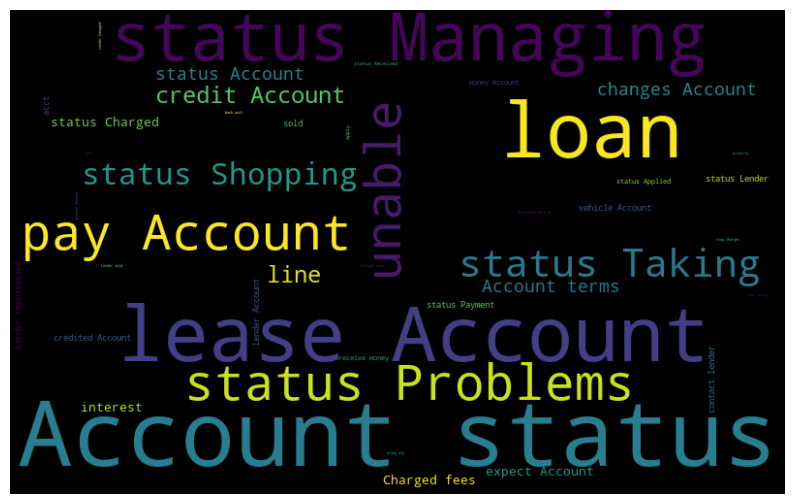

Money transfers


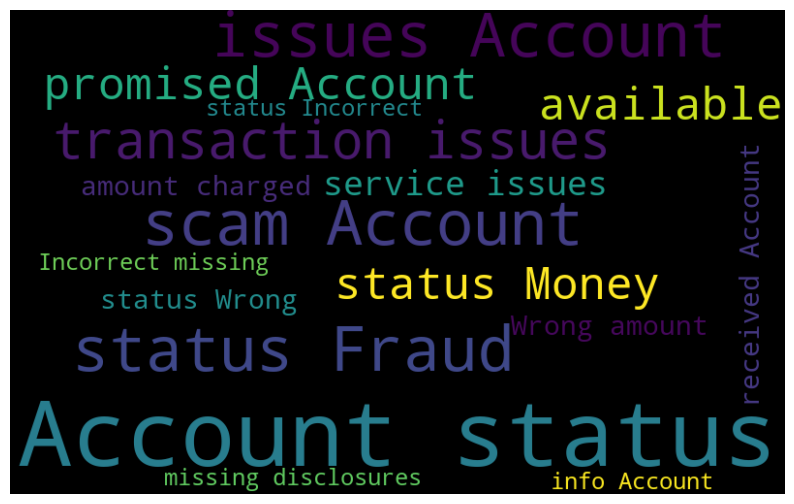

Payday loan


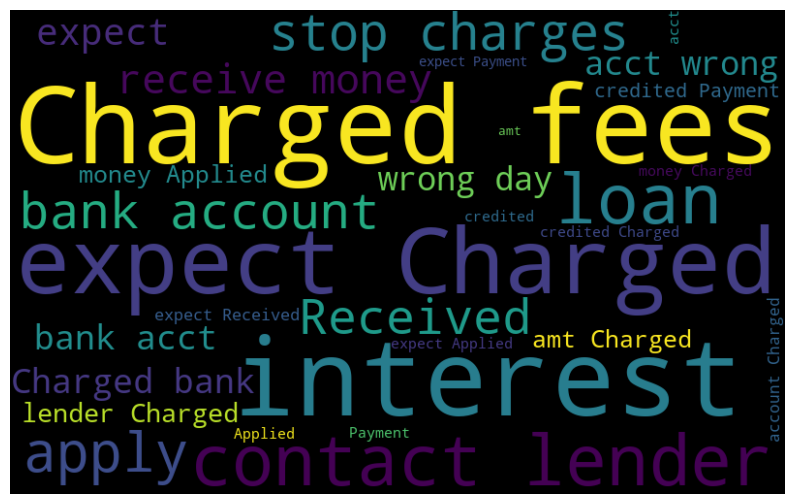

Prepaid card


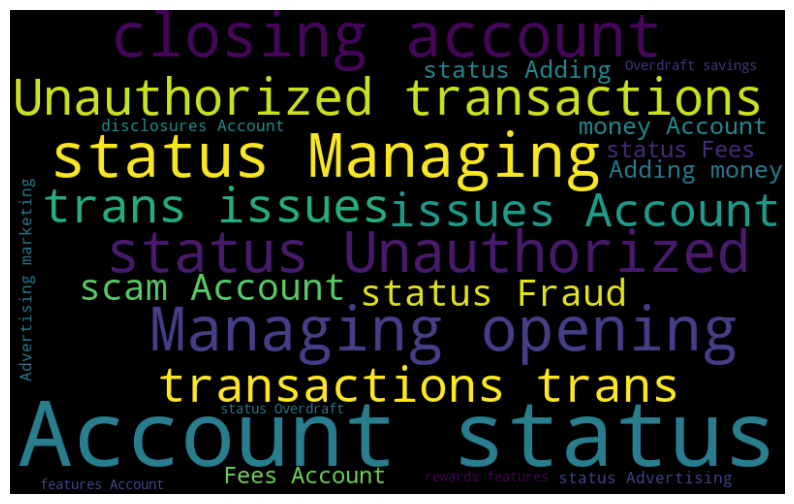

Other financial service


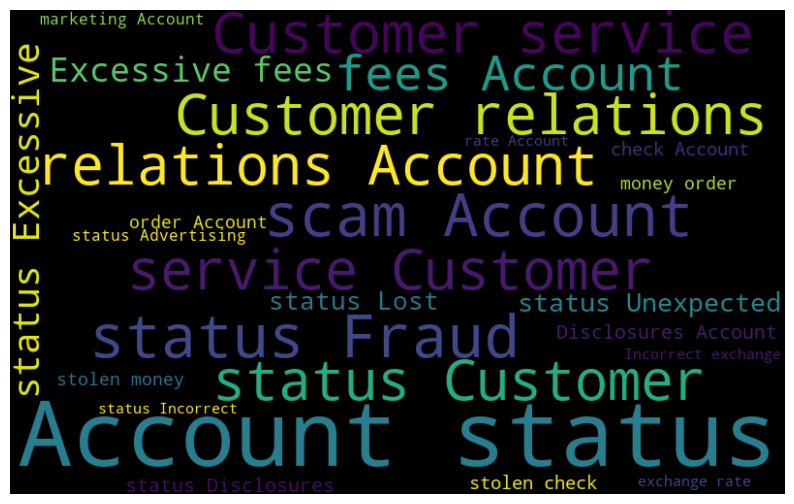

In [47]:
for product_name in bank_data['product'].unique():
    print(product_name)
    all_words = ' '.join([text for text in bank_data2.loc[bank_data2['product'].str.contains(product_name),'Detail_issues']])
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [49]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
features = tfidf.fit_transform(bank_data2.processed_text).toarray()

In [50]:
print(features.shape)

(555957, 658)


In [51]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
labels = le.fit_transform(bank_data2['product'])
print(labels.shape)

(555957,)


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.3,
                                                    random_state = 0)

# LOGISTIC REGRESSION

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 100)

In [55]:
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
print("Train Accuracy Logistic Regression:",model.score(X_train, y_train))
Logistic_Regression = print("Test Accuracy Logistic Regression:",model.score(X_test, y_test))

Train Accuracy Logistic Regression: 0.9887992106257179
Test Accuracy Logistic Regression: 0.9892258435858695


# RANDOM FOREST

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [58]:
model1 = RandomForestClassifier(max_depth=10)

In [59]:
model1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [60]:
print("Train Accuracy Random Forest:",model1.score(X_train, y_train))
Random_Forest =print("Test Accuracy Random Forest:",model1.score(X_test, y_test))

Train Accuracy Random Forest: 0.9581210219724593
Test Accuracy Random Forest: 0.958498213300717


# SVM

In [61]:
from sklearn import svm
from sklearn import metrics

In [62]:
model2=svm.SVC(kernel='rbf', C=1, gamma='scale')

In [63]:
model2.fit(X_train, y_train)

SVC(C=1)

In [64]:
print("Train Accuracy SVC:",model2.score(X_train, y_train))
SVM = print("Test Accuracy SVC:",model2.score(X_test, y_test))

Train Accuracy SVC: 0.9888583109137675
Test Accuracy SVC: 0.9893037868431782


# NAIVE BAYES

In [66]:
from sklearn.naive_bayes import MultinomialNB

In [67]:
model3 = MultinomialNB()

In [68]:
model3.fit(X_train, y_train)

MultinomialNB()

In [69]:
y_pred =model3.predict(X_test)

In [70]:
accuracy = (y_pred == y_test).sum() / len(y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 98.32%


In [71]:
print("Train Accuracy Regression:",model3.score(X_train, y_train))
Multinomial_Naive_Bayes = print("Test Accuracy Regression:",model3.score(X_test, y_test))

Train Accuracy Regression: 0.982673337290483
Test Accuracy Regression: 0.9832362040434564


In [72]:
# OBSERVATION AND BEST MODEL SELECTION

<BarContainer object of 4 artists>

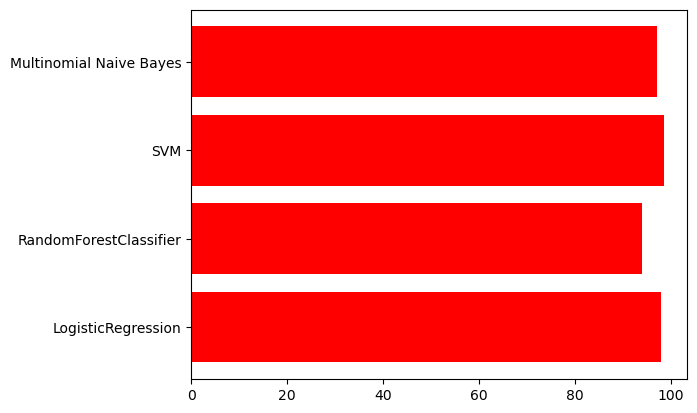

In [73]:
Model=["LogisticRegression","RandomForestClassifier","SVM","Multinomial Naive Bayes"]
Accuracy=[98,95,98.5,97.2 ]
plt.barh(Model,Accuracy,color="r")

# Hyper parameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [75]:
nb = MultinomialNB()

# Set up the hyperparameter tuning grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Train the Multinomial Naive Bayes classifier with the best hyperparameters
best_nb = MultinomialNB(alpha=grid_search.best_params_['alpha'])
best_nb.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred = best_nb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = (y_pred == y_test).sum() / len(y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Best hyperparameters:  {'alpha': 0.5}
Accuracy: 98.32%


In [76]:
# Test the best model found by GridSearchCV on the testing set
y_pred = grid_search.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, y_pred)

In [79]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= bank_data2["product"].unique()))

                         precision    recall  f1-score   support

               Mortgage       1.00      1.00      1.00     18550
       Credit reporting       1.00      0.98      0.99      6113
           Student loan       1.00      0.88      0.93     19884
        Debt collection       1.00      1.00      1.00     27483
            Credit card       1.00      1.00      1.00     30406
Bank account or service       0.61      1.00      0.76      1176
          Consumer Loan       0.97      1.00      0.98     56338
        Money transfers       0.94      0.36      0.52       169
            Payday loan       0.92      1.00      0.96      1152
           Prepaid card       1.00      0.81      0.89       703
Other financial service       1.00      1.00      1.00      4814

               accuracy                           0.98    166788
              macro avg       0.95      0.91      0.91    166788
           weighted avg       0.99      0.98      0.98    166788



In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[18550     0     0     0     0     0     0     0     0     0     0]
 [    0  6011     0     0     0     0     0     4    98     0     0]
 [    0     0 17436     0     0   550  1898     0     0     0     0]
 [    0     0     0 27483     0     0     0     0     0     0     0]
 [    0     0     0     0 30406     0     0     0     0     0     0]
 [    0     0     0     0     0  1176     0     0     0     0     0]
 [    0     0     0     0     0     0 56338     0     0     0     0]
 [    0     0    50     0     0    58     0    61     0     0     0]
 [    0     0     0     0     0     0     0     0  1152     0     0]
 [    0     0     0     0     0   136     1     0     0   566     0]
 [    0     0     0     0     0     0     0     0     0     0  4814]]


# LETS PREDICT NEW INPUT ISSUE TO GET PRODUCTC DETAILS

In [81]:
new_input = "Incorrect on credit report account status"

# Convert the new input into a vector
new_input_vector = tfidf.transform([new_input])

# Predict the category of the new input
predicted_category = model3.predict(new_input_vector)

In [82]:
predicted_category

array([3])